In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
titan=pd.read_csv('train.csv')

In [43]:
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

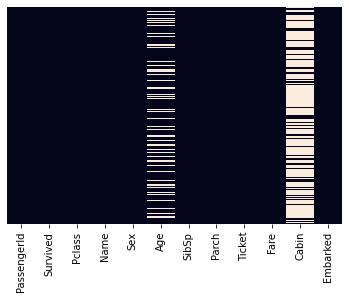

In [44]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

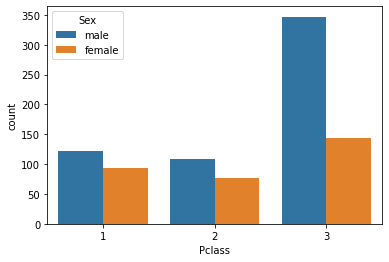

In [45]:
sns.countplot(x='Pclass',hue='Sex',data=titan)

<AxesSubplot:xlabel='Sex', ylabel='count'>

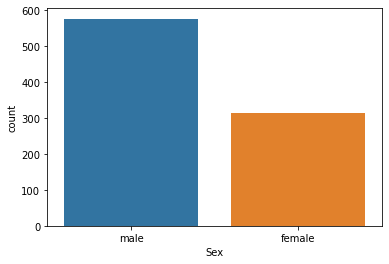

In [46]:
sns.countplot(x='Sex',data=titan)

<AxesSubplot:xlabel='Parch', ylabel='count'>

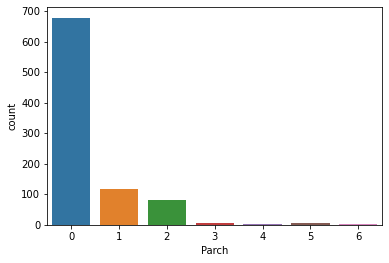

In [47]:
sns.countplot(x='Parch',data=titan)

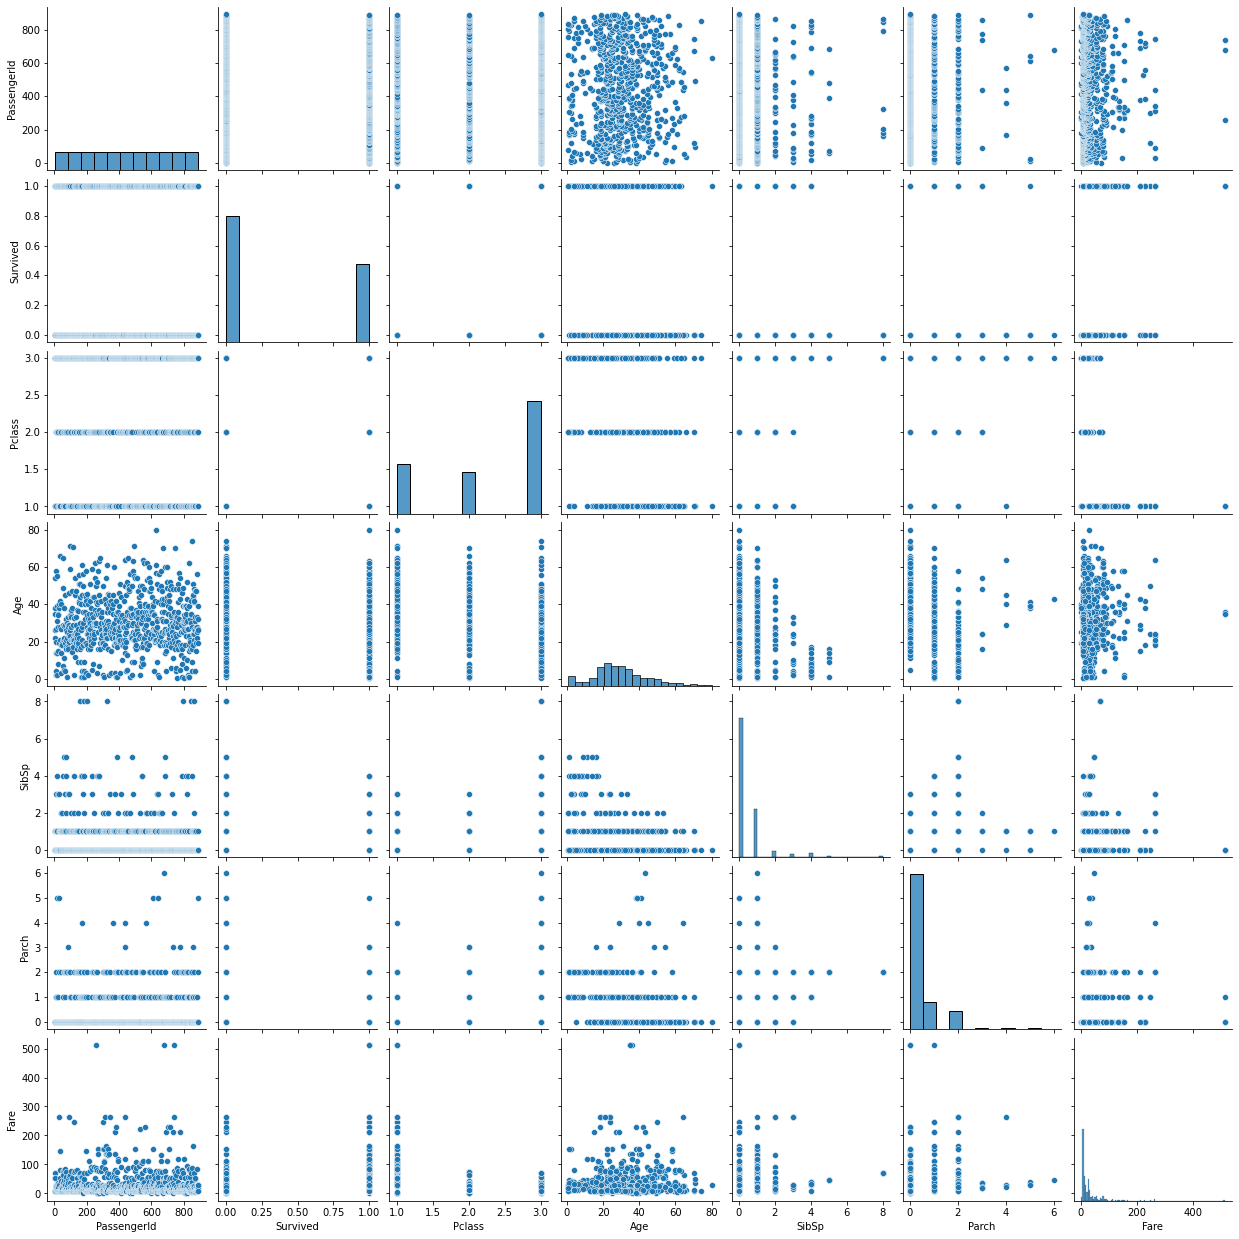

In [48]:
sns.pairplot(titan)

<AxesSubplot:xlabel='Survived', ylabel='count'>

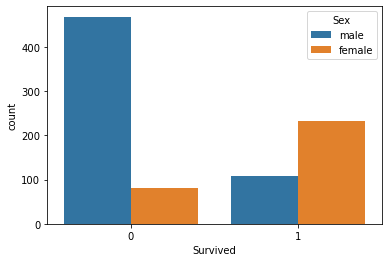

In [49]:
sns.countplot(x='Survived',hue='Sex',data=titan)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

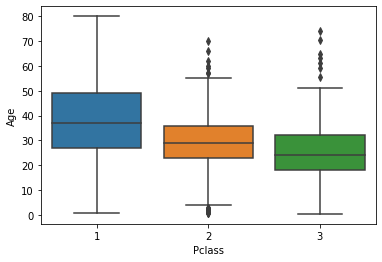

In [50]:
sns.boxplot(x='Pclass',y='Age',data=titan)

In [51]:
import cufflinks as cf

In [52]:
cf.go_offline()

In [53]:
titan['Age'].iplot(kind='box')

In [54]:
def agge(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 27
    else:
        return Age

In [55]:
titan['Age'] = titan[['Age','Pclass']].apply(agge,axis=1)

<AxesSubplot:>

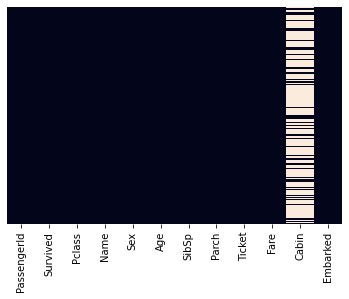

In [56]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False)

In [57]:
titan.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

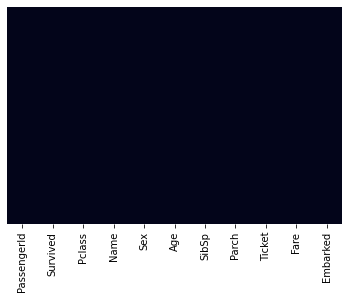

In [58]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False)

In [59]:
from pandas_profiling import ProfileReport

In [60]:
pp_report=ProfileReport(titan)
pp_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
gender=pd.get_dummies(titan['Sex'],drop_first=True)
enber=pd.get_dummies(titan['Embarked'],drop_first=True)

In [62]:
titan.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [63]:
titan=pd.concat([titan,gender,enber],axis=1)

In [64]:
titan.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X=titan.drop('Survived',axis=1)
y=titan['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log=LogisticRegression()

In [69]:
log.fit(X_train,y_train)

C:\Users\VIKAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [70]:
pred=log.predict(X_test)

<AxesSubplot:ylabel='count'>

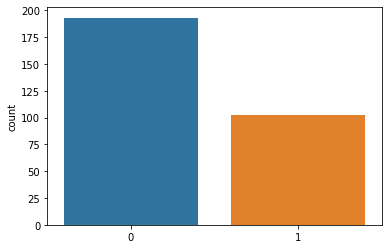

In [71]:
sns.countplot(x=pred)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       169
           1       0.80      0.65      0.72       126

    accuracy                           0.78       295
   macro avg       0.79      0.77      0.77       295
weighted avg       0.79      0.78      0.78       295

